In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
num = 1000
negative_samples=np.random.multivariate_normal(mean=[0,3], cov=[[1, 0.5],[0.5, 1]], size=num)
# print(negative_sample)

2024-11-03 21:04:21.387763: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-03 21:04:21.394788: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-03 21:04:21.403232: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-03 21:04:21.405718: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-03 21:04:21.413668: I tensorflow/core/platform/cpu_feature_guar

In [2]:
positive_samples = np.random.multivariate_normal(mean=[3,0], cov=[[1, 0.5],[0.5, 1]], size=num)
# print(positive_sample)

In [3]:
inputs=np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(inputs)

[[-0.54451656  2.9785156 ]
 [ 1.0288389   2.9366324 ]
 [-0.44155493  2.1728442 ]
 ...
 [ 4.125895    1.1220409 ]
 [ 3.9759986   0.25240037]
 [ 2.6768756  -1.4614733 ]]


In [4]:
targets = np.vstack((np.zeros((num, 1), dtype="float32"), np.ones((num, 1), dtype="float32")))
print(targets)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


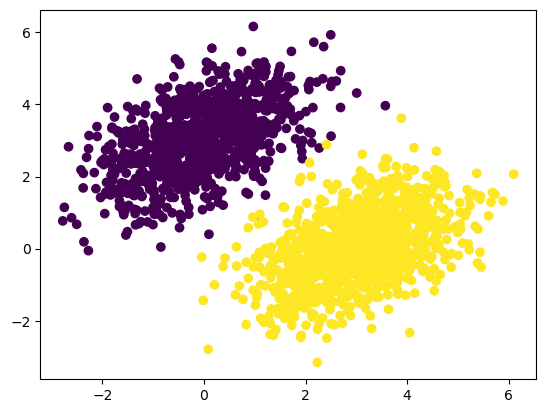

In [5]:
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

In [6]:
input_dim =2
output_dim =1
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
learning_rate = 0.1

def model(inputs):
    return tf.matmul(inputs, W) +b

def square_loss(targets, predictions):
    per_samle_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_samle_losses)

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

for step in range(40):
    loss = training_step(inputs, targets)
    # print(f"Loss at step {step}:{loss:.4f}")
print(f"Loss at step {step}:{loss:.4f}")

I0000 00:00:1730639062.952681   48901 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730639063.171549   48901 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730639063.171621   48901 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730639063.173982   48901 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730639063.174081   48901 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Loss at step 39:0.0300


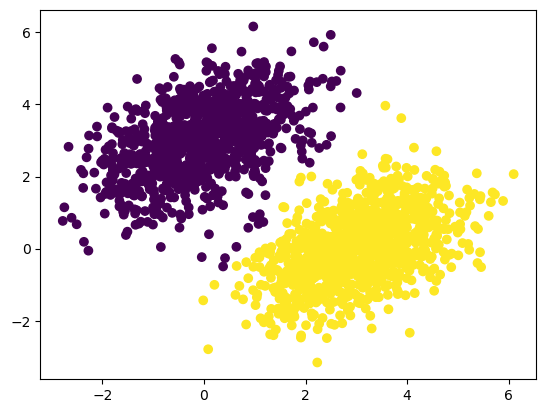

In [7]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c = predictions[:,0]>0.5)
plt.show()

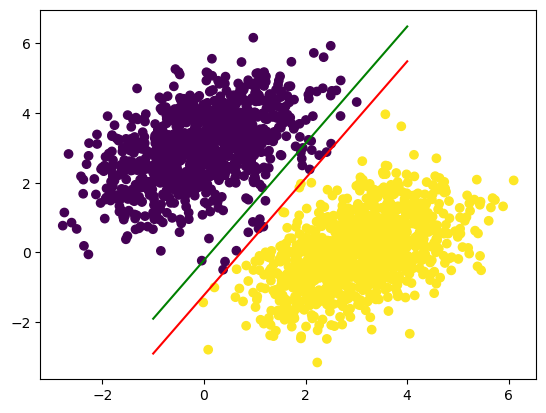

In [8]:
x = np.linspace(-1, 4, 100)
y = -W[0]/W[1]*x + (0.5 -b)/W[1]
plt.plot(x,y,"-r")
plt.plot(x,y+1,"-g")
plt.scatter(inputs[:,0], inputs[:,1], c = predictions[:,0]>0.5)
# plt.show()